# 准备数据

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils

### 导入（下载）数据集

In [10]:
(x_train_image, y_train_label),(x_test_image, y_test_label) = mnist.load_data()

In [11]:
print("train data num:"+str(len(x_train_image)))
print("test data num:"+str(len(x_test_image)))

train data num:60000
test data num:10000


In [12]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [13]:
def plot_image(image):
    #设置显示图形的大小
    fig = plt.gcf()
    fig.set_size_inches(1, 1)
    #使用imshow显示图形，传入image，cmap='binary'表示以黑白灰度显示
    plt.imshow(image, cmap='binary')
    #开始绘图
    plt.show()

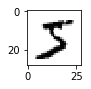

In [14]:
plot_image(x_train_image[0])

In [15]:
y_train_label[0]

5

### 训练数据预处理：转换为一维向量

In [16]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
#
print ('x_train:',x_Train.shape)
print ('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [17]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### 训练数据预处理：标准化

In [18]:
x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255
#
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### 测试数据预处理：One-Hot编码

In [19]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [35]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Train_OneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

---

# 建立模型

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [30]:
#创建线性堆叠模型Sequential
model = Sequential()

In [31]:
model.add(Dense(
    input_dim=784, #输入层神经元个数
    units=256, #神经元个数
    kernel_initializer='normal', #使用正态分布的随机数来初始化权重和偏差
    activation='relu' #激活函数
))
model.add(Dense(
    units=10, #因为是最后一层，所以是输出层
    kernel_initializer='normal', 
    activation='softmax'
))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 进行训练

In [32]:
# 设置训练模型
model.compile(
    loss='categorical_crossentropy', # 设置损失函数，使用交叉熵
    optimizer='adam', # 设置优化器，为Adam优化器
    metrics=['accuracy']# 设置评估模型的方式，为准确率
)

In [36]:
train_history =model.fit(
    x=x_Train_normalize,# 特征值
    y=y_Train_OneHot,# 真实值
    validation_split=0.2, # 训练与验证数据比例
    epochs=10, # 训练周期次数
    batch_size=200, #每一次训练周期的训练数据量
    verbose=2 #显示训练过程
)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4376 - accuracy: 0.8852 - val_loss: 0.2198 - val_accuracy: 0.9400
Epoch 2/10
 - 1s - loss: 0.1928 - accuracy: 0.9451 - val_loss: 0.1552 - val_accuracy: 0.9579
Epoch 3/10
 - 1s - loss: 0.1350 - accuracy: 0.9615 - val_loss: 0.1266 - val_accuracy: 0.9644
Epoch 4/10
 - 1s - loss: 0.1023 - accuracy: 0.9711 - val_loss: 0.1137 - val_accuracy: 0.9672
Epoch 5/10
 - 1s - loss: 0.0821 - accuracy: 0.9771 - val_loss: 0.0990 - val_accuracy: 0.9709
Epoch 6/10
 - 1s - loss: 0.0664 - accuracy: 0.9814 - val_loss: 0.0920 - val_accuracy: 0.9717
Epoch 7/10
 - 1s - loss: 0.0538 - accuracy: 0.9849 - val_loss: 0.0880 - val_accuracy: 0.9732
Epoch 8/10
 - 1s - loss: 0.0452 - accuracy: 0.9879 - val_loss: 0.0843 - val_accuracy: 0.9754
Epoch 9/10
 - 1s - loss: 0.0369 - accuracy: 0.9901 - val_loss: 0.0808 - val_accuracy: 0.9763
Epoch 10/10
 - 1s - loss: 0.0307 - accuracy: 0.9923 - val_loss: 0.0814 - val_accuracy: 0.9772


In [42]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')# 图的标题
    plt.ylabel(train)# y轴的标签
    plt.xlabel('Epoch')# x轴的标签
    plt.legend(['train', 'validation'], loc='upper left')# 图例显示及位置
    plt.show()

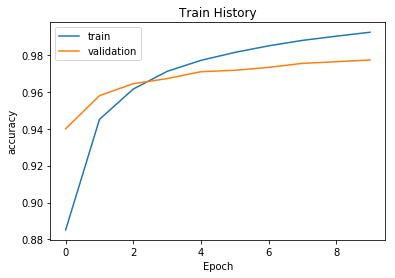

In [43]:
show_train_history(train_history,'accuracy','val_accuracy')# 传入历史数据，画出的是历史数据中的accuracy和val_accuracy

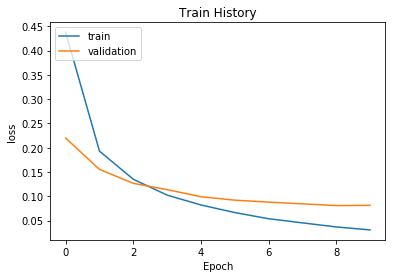

In [44]:
show_train_history(train_history,'loss','val_loss')

# 评估模型的准确率

In [48]:
y_Test_OneHot = np_utils.to_categorical(y_test_label)
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 17us/step
accuracy= 0.9779000282287598


# 进行预测

In [49]:
prediction=model.predict_classes(x_Test)

In [51]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

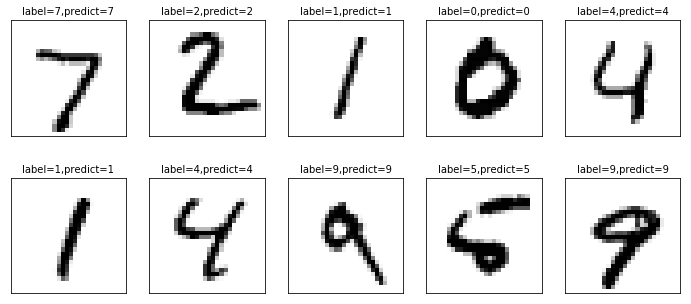

In [52]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# 显示混淆矩阵

In [54]:
import pandas as pd

In [60]:
# 建立混淆矩阵
pd.crosstab(
    y_test_label,
    prediction,
    rownames=['label'],# 设置行的名称
    colnames=['predict']# 设置列的名称
)

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,3,1,0,0,2,1,3,0
1,0,1125,4,0,0,1,2,0,3,0
2,3,1,1016,1,1,0,1,5,4,0
3,1,0,2,1000,0,1,0,3,3,0
4,0,0,8,0,960,0,1,2,1,10
5,3,0,1,20,2,852,6,2,2,4
6,6,2,3,1,5,3,936,0,2,0
7,1,4,10,5,0,0,0,1003,0,5
8,3,0,7,14,1,5,1,4,937,2


In [56]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [57]:
#查看预测是3，实际是5的数据
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2597,5,3
2810,5,3
3902,5,3
4271,5,3
4300,5,3


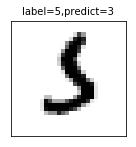

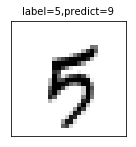

In [59]:
# 查看第340项结果
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)
# 查看第1289项结果
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)